# Twitter Sentiment Analysis

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time as t
from configparser import ConfigParser
config = ConfigParser()

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
# sns.set_style('white')
plt.style.use('fivethirtyeight')

from tqdm import tqdm
tqdm.pandas()

# Sentiment Analysis Library
import datapreprocessing
import sentimentscoring

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# Importing and Processing twitter data
####################################################
filename =  "../../Data/Unprocessed_data/Chainlink_56692.csv"
coin_symbol = "LINK"
####################################################

data = pd.read_csv(filename)
data = datapreprocessing.preprocess_twitter(data, scam_dict='Scam_keywords.txt').copy()

Detecting scam tweets...


100%|██████████| 56692/56692 [00:12<00:00, 4407.39it/s]


Remaining data: 78 %

Cleaning text...


100%|██████████| 44444/44444 [00:00<00:00, 123395.93it/s]


Done.


In [3]:
# Importing price data for the coin
##########################
get_price_info = True
##########################

if get_price_info:
    prices = sentimentscoring.get_price_data(coin_symbol)

Connecting to Token Metrics Database...
Price data retrieved.


### Sentiment

In [4]:
# Extracting sentiment of tweets
sentiment_data = sentimentscoring.get_sentiment(data)

Computing sentiment with Textblob...


100%|██████████| 44444/44444 [00:10<00:00, 4044.18it/s]


Computing sentiment with Vader...


100%|██████████| 44444/44444 [00:11<00:00, 3883.55it/s]


Done.


### Visualization of some tweets

In [5]:
########################
nb_to_print = 3
########################

print('Worst tweets:\n')
sentimentscoring.print_worse(sentiment_data, nb_to_print)
print('\n--------\nBest tweets:\n')
sentimentscoring.print_best(sentiment_data, nb_to_print)

Worst tweets:

1) BREAKING: MakerDAO to add $LINK to MCD collateral OOOOOOoooOOOOooOOOoOOOo but wen will they add chainlinked oracles? one day, maybe someday, soooooooooooooooooon what was that?! Chainlink wait WTF WAS THAT??!?!?!?! OOoOooOoOooooOoOoOoOooooo Tonight. https://twitter.com/ChainLinkGod/status/1251613806821666816

2) Teeka tiwari just send out an email to Palm Beach Confidential investors to sell $link and $xtz chainlink tezos PBC WTF GUYS BECAREFUL!!! There might be an incoming dump!!! Set your stoplosses!!!

3) Agreed, ti was a VERY stupid move but what about their point? Chainlink is going to ignore everything and you $LINK marines are going to scream FUD like morons until when? Are you paid? How issues raise do not make you ask some questions to SergeyNazarov ?


--------
Best tweets:

1) See how the $LINK community is embarassing theirselfes. Awesome. THAT is awesome chainlink Gonna write an article soon: "XRP, TRX, LINK - The Best Cults in Crypto" Or: "What to know b

### Simple moving average

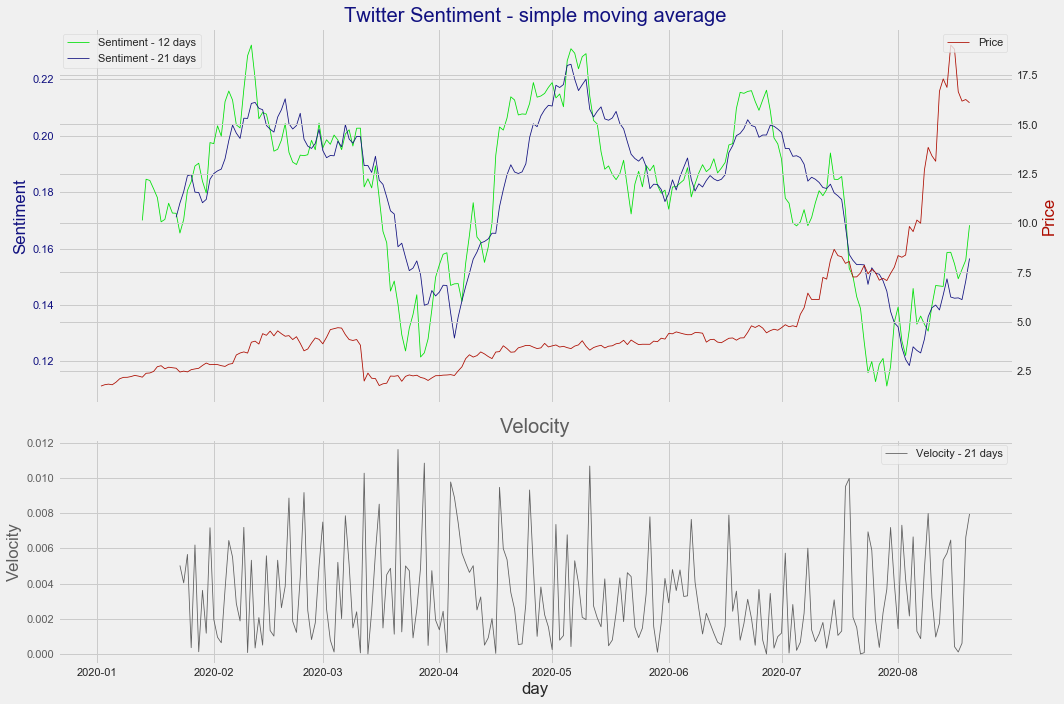

In [12]:
sentimentscoring.plot_moving_average(sentiment_data, price_data=prices, twitter=True, window1=12, window2=21, type='simple')

### Weighted Moving Average

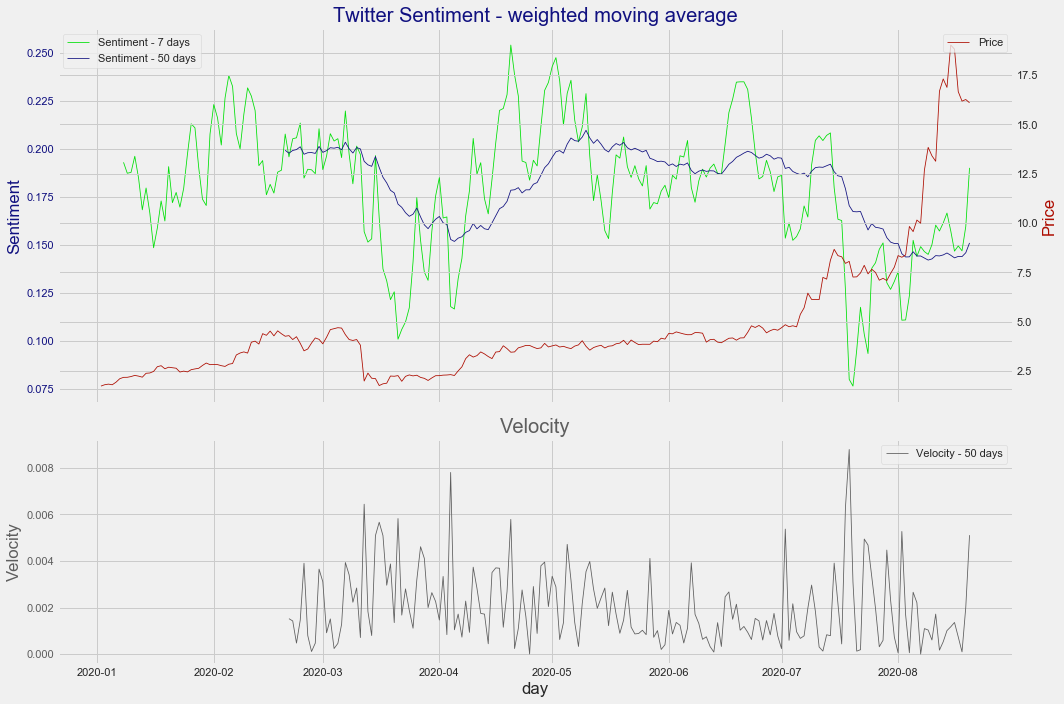

In [7]:
sentimentscoring.plot_moving_average(sentiment_data, price_data=prices, twitter=True, window1=7, window2=50, type='weighted')

### Exponential Moving Average

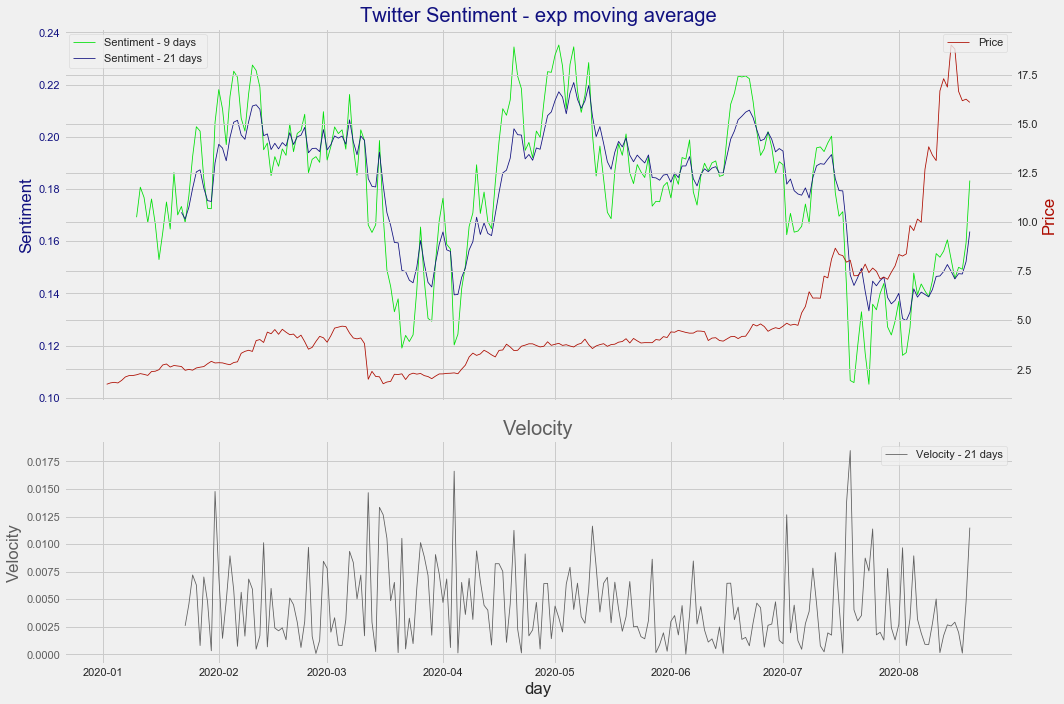

In [17]:
sentimentscoring.plot_moving_average(sentiment_data, price_data=prices, twitter=True, window1=9, window2=21, type='exp')

## MACD

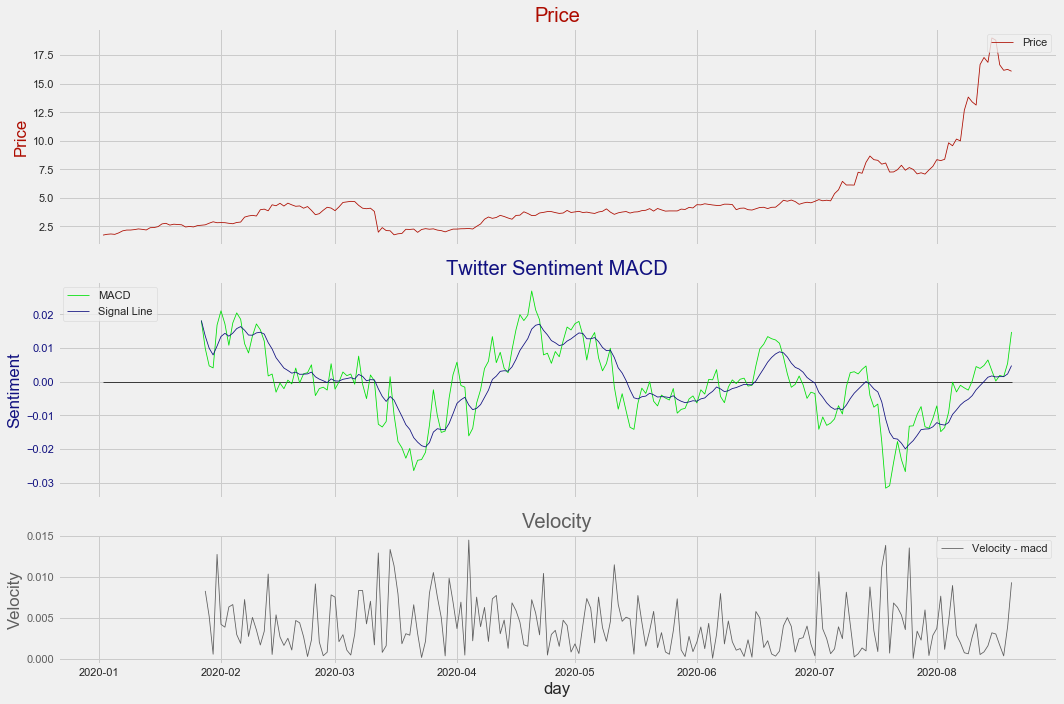

In [11]:
sentimentscoring.plot_moving_average(sentiment_data, price_data=prices, window1=12, window2=26, twitter=True, type='macd')